In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df1=pd.read_csv(r"C:\Users\lucius seneca\CampusX\Project\Titanic_Survival_Prediction\Kaggle Data\train.csv")

In [3]:
df2=pd.read_csv(r"C:\Users\lucius seneca\CampusX\Project\Titanic_Survival_Prediction\Kaggle Data\test.csv")

In [4]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df2=df2.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [6]:
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [7]:
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

<Axes: xlabel='Fare', ylabel='Density'>

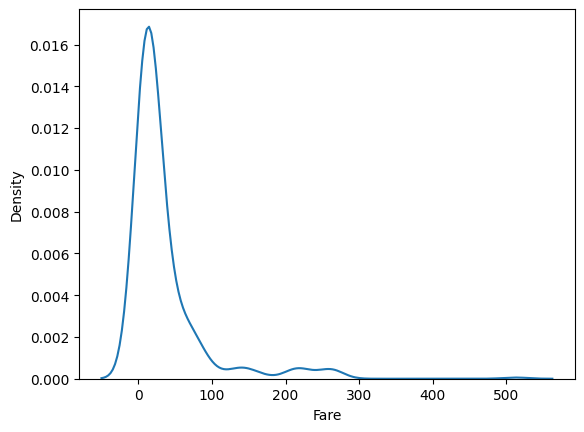

In [8]:
sns.kdeplot(df2["Fare"])

In [9]:
df2["Fare"].median()

14.4542

In [10]:
df2["Fare"].mean()

35.627188489208635

In [12]:
df2["Fare"]=df2["Fare"].fillna(value=df2["Fare"].median())

In [13]:
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [14]:
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [15]:
transformer=ColumnTransformer(
    transformers=[
        ("knn",KNNImputer(weights="distance"),["Age"]),
        ("OHE",OneHotEncoder(sparse_output=False,drop="first"),["Sex","Embarked"]),



    ],remainder="passthrough"

    
)

In [18]:
X=df2.iloc[:,:]

In [19]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [20]:
X_trf=transformer.fit_transform(X)

In [21]:
X_trf

array([[34.5       ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  7.8292    ],
       [47.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  7.        ],
       [62.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  9.6875    ],
       ...,
       [38.5       ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  7.25      ],
       [30.27259036,  1.        ,  0.        , ...,  0.        ,
         0.        ,  8.05      ],
       [30.27259036,  1.        ,  0.        , ...,  1.        ,
         1.        , 22.3583    ]])

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_final=scaler.fit_transform(X_trf)

In [23]:
X_final

array([[ 3.34992599e-01,  7.55928946e-01,  2.84375747e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.97413332e-01],
       [ 1.32553003e+00, -1.32287566e+00, -3.51647429e-01, ...,
         6.16992373e-01, -4.00247702e-01, -5.12278007e-01],
       [ 2.51417495e+00,  7.55928946e-01,  2.84375747e+00, ...,
        -4.99470017e-01, -4.00247702e-01, -4.64100469e-01],
       ...,
       [ 6.51964577e-01,  7.55928946e-01, -3.51647429e-01, ...,
        -4.99470017e-01, -4.00247702e-01, -5.07796376e-01],
       [-2.53374904e-15,  7.55928946e-01, -3.51647429e-01, ...,
        -4.99470017e-01, -4.00247702e-01, -4.93455155e-01],
       [-2.53374904e-15,  7.55928946e-01, -3.51647429e-01, ...,
         6.16992373e-01,  6.19895831e-01, -2.36957042e-01]])

In [24]:
import joblib
loaded_model=joblib.load("model.joblib")

In [25]:
prediction=loaded_model.predict(X_final)

In [28]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
submission=pd.DataFrame({"Survived":prediction})

In [30]:
submission

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [32]:
submission.to_csv("submission.csv",index=False)